<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/07/0721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install umap-learn

## K-means limitations

In [2]:
import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

from sklearn.datasets import fetch_openml
from sklearn.datasets import make_blobs

from scipy.stats import multivariate_normal

import umap

from yellowbrick.cluster import SilhouetteVisualizer

sns.set_theme()
random.seed(3)

### Sensitivity to outliers



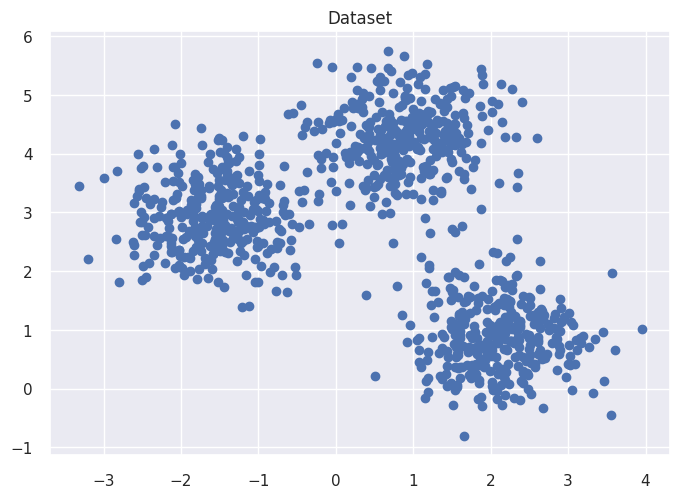

In [3]:
# Create synthetical dataset with 3 clusters
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=0)

# Plot the clustering
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset')
plt.show()

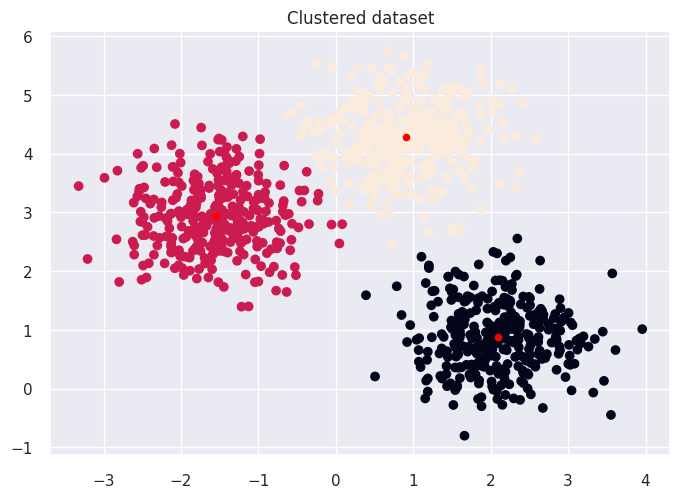

In [4]:
# Cluster synthetic dataset
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

# Plot the clustering
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
plt.title('Clustered dataset')
plt.show()

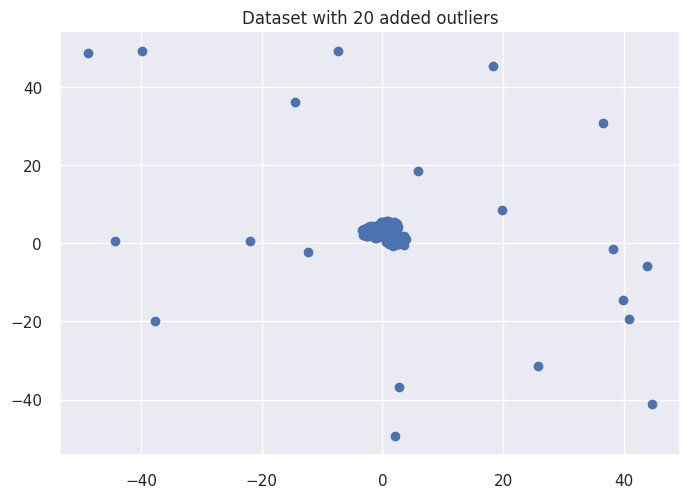

In [5]:
# Add outliers
X_outliers = np.random.uniform(low=-50, high=50, size=(20, 2))
X = np.vstack([X, X_outliers])

# Plot the clustering
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset with 20 added outliers')
plt.show()

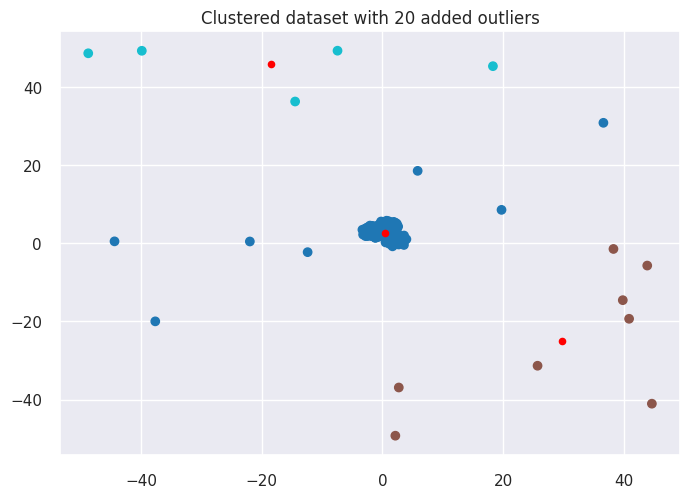

In [6]:
# Cluster again
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_,cmap='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
plt.title('Clustered dataset with 20 added outliers')
plt.show()

### Sensitivity to non regular cluster shapes


#### Example 1 - elongated clusters

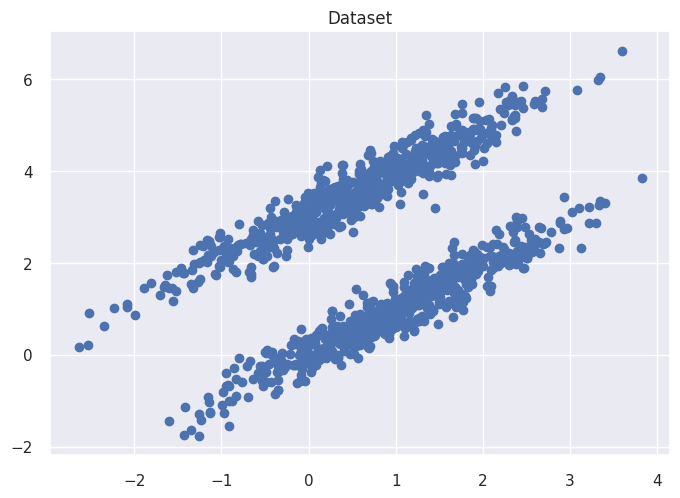

In [7]:
multivar = multivariate_normal(cov = [[1, 0.95],[0.95,1]], mean = [1,1])
X1 = multivar.rvs(size = 600)

multivar = multivariate_normal(cov = [[1, 0.95],[0.95,1]], mean = [0.5,3.5])
X2 = multivar.rvs(size = 600)

X = np.vstack([X1, X2])

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset')
plt.show()

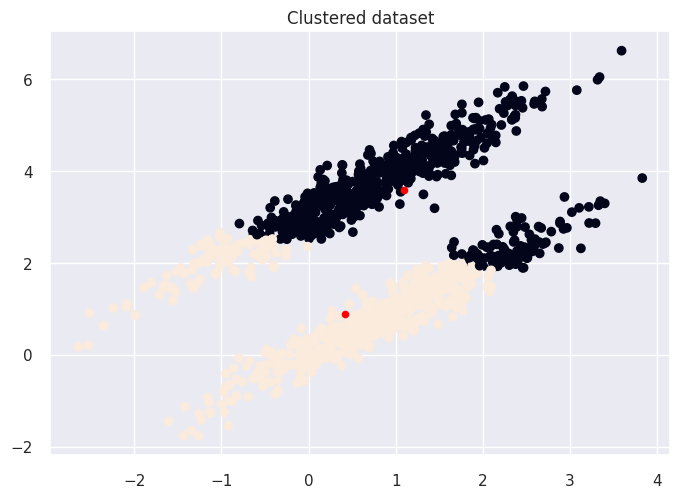

In [8]:
# Perform clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
plt.title('Clustered dataset')
plt.show()

#### Example 2 - Different cluster shape and size

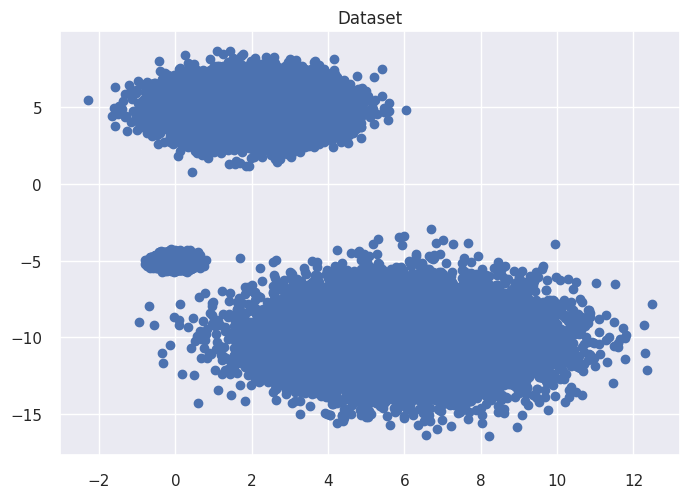

In [9]:
X, y = make_blobs(
    n_samples=50000,
    centers=[[2,5],[6,-10],[0,-5]],
    cluster_std=[1.0, 1.7, 0.2],
    random_state=10
)

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.title('Dataset')
plt.show()

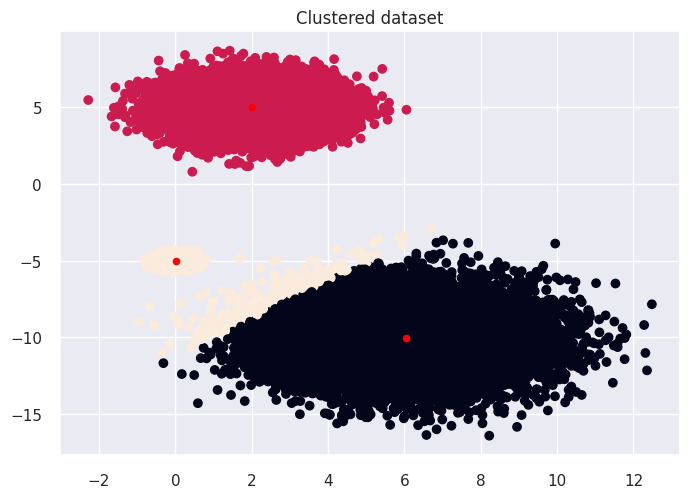

In [10]:
# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red')
plt.title('Clustered dataset')
plt.show()

### Example - k-means clustering on digits dataset

In [21]:
# Load the digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize digits data
digits_data = mnist.data/255
digit_labels = mnist.target.astype(object)

# Subset the dataset
digit_labels_df = pd.DataFrame(digit_labels)
# subset the data set in order for the silhouette scores to be calculated faster
label_subset_df = digit_labels_df.groupby('class').head(2000)

digits_data = digits_data.loc[label_subset_df.index, :].reset_index(drop=True)
digit_labels = label_subset_df['class'].to_numpy()

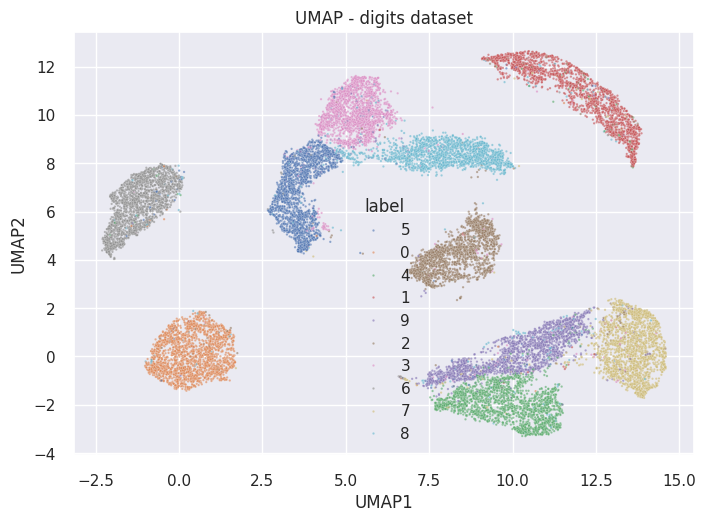

In [22]:
# Perfrom UMAP dimensionality reduction
umap_obj = umap.UMAP()
embedding = umap_obj.fit_transform(digits_data)

# Plot embeddings
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['label'] = digit_labels

sns.scatterplot(embedding_df, x='UMAP1', y='UMAP2', hue='label', alpha=0.6, s=3)
plt.title('UMAP - digits dataset')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


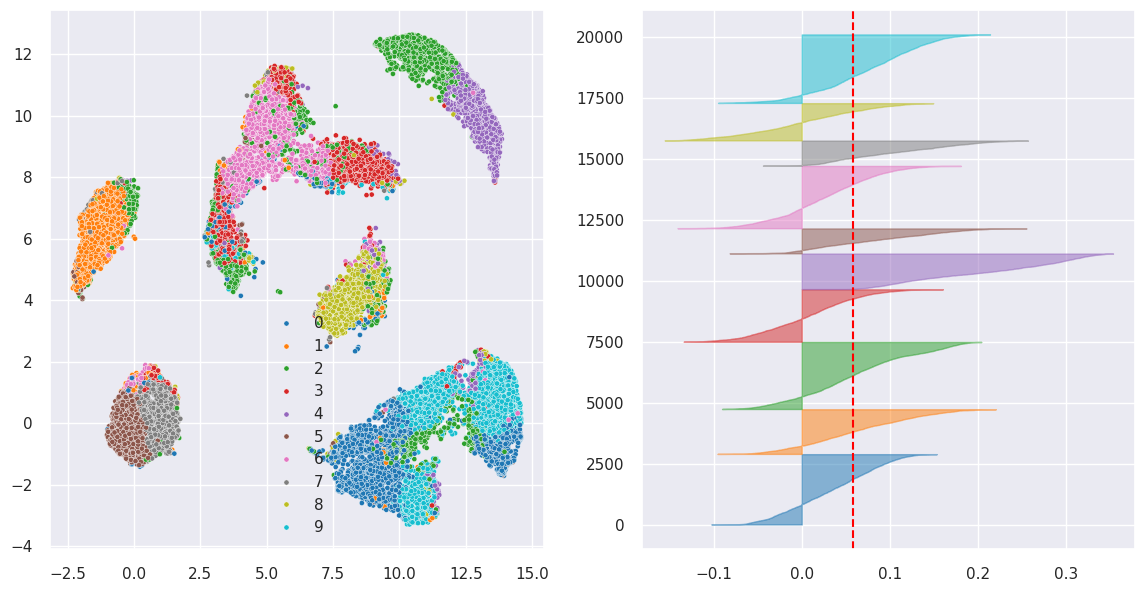

In [23]:
# Plot clusters and silhouettes for several values of "k"
num_clust=10
tab10 = list(matplotlib.colormaps['tab10'].colors)

# Perform clustering for multiple resolutons
fig, axs = plt.subplots(
    1, 2,
    figsize=(14, 7)
)

cluster_label_dict = {}

# Perform clustering for current number of clusters
kmeans = KMeans(n_clusters=num_clust, n_init='auto')
kmeans.fit(digits_data)

sns.scatterplot(
    x=embedding[:,0],
    y=embedding[:,1],
    hue=kmeans.labels_,
    ax=axs[0],
    s=14, palette='tab10'
)

visualizer = SilhouetteVisualizer(
    kmeans,
    is_fitted=True,
    colors=tab10,
    ax=axs[1]
)

visualizer = visualizer.fit(digits_data.to_numpy())